<a href="https://colab.research.google.com/github/Harish-govindaraj/test/blob/main/MovieGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing SVM


In [ ]:
pip install SVM


  Using cached svm-0.1.0-py3-none-any.whl


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #re is used for pattern matching and text manipulation.
import string
import nltk #it is a powerful library for working with human language data
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


**To Read a Data**



In [7]:
train_path="/content/train_data.txt"
train_data=pd.read_csv(train_path, sep=":::",names=["TITLE","GENRE","DESCRIPTION"],engine="python")

In [8]:
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
19162,Granitza (1994),drama,An autumn day in the 1970s. In the mountains ...
19163,Vintage (????),drama,"A psychological dramedy, where a well known A..."
19164,Slaughterbots (2017),short,In response to growing concerns about autonom...
19165,Dwitiyo Ripu (2015),drama,Raktim Bose is struggling to publish his firs...


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19166 entries, 1 to 19166
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        19166 non-null  object
 1   GENRE        19166 non-null  object
 2   DESCRIPTION  19166 non-null  object
dtypes: object(3)
memory usage: 598.9+ KB


In [10]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,19166,19166,19166
unique,19166,27,19142
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,4788,4


In [11]:
train_data.isnull().sum()

,0
TITLE,0
GENRE,0
DESCRIPTION,0


In [12]:
test_path="/content/test_data.txt"
test_data=pd.read_csv(train_path,sep=":::",names=["ID","TITLE","DESCRIPTION"],engine="python")

In [13]:
test_data

,ID,TITLE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
19162,Granitza (1994),drama,An autumn day in the 1970s. In the mountains ...
19163,Vintage (????),drama,"A psychological dramedy, where a well known A..."
19164,Slaughterbots (2017),short,In response to growing concerns about autonom...
19165,Dwitiyo Ripu (2015),drama,Raktim Bose is struggling to publish his firs...


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19166 entries, 1 to 19166
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           19166 non-null  object
 1   TITLE        19166 non-null  object
 2   DESCRIPTION  19166 non-null  object
dtypes: object(3)
memory usage: 598.9+ KB


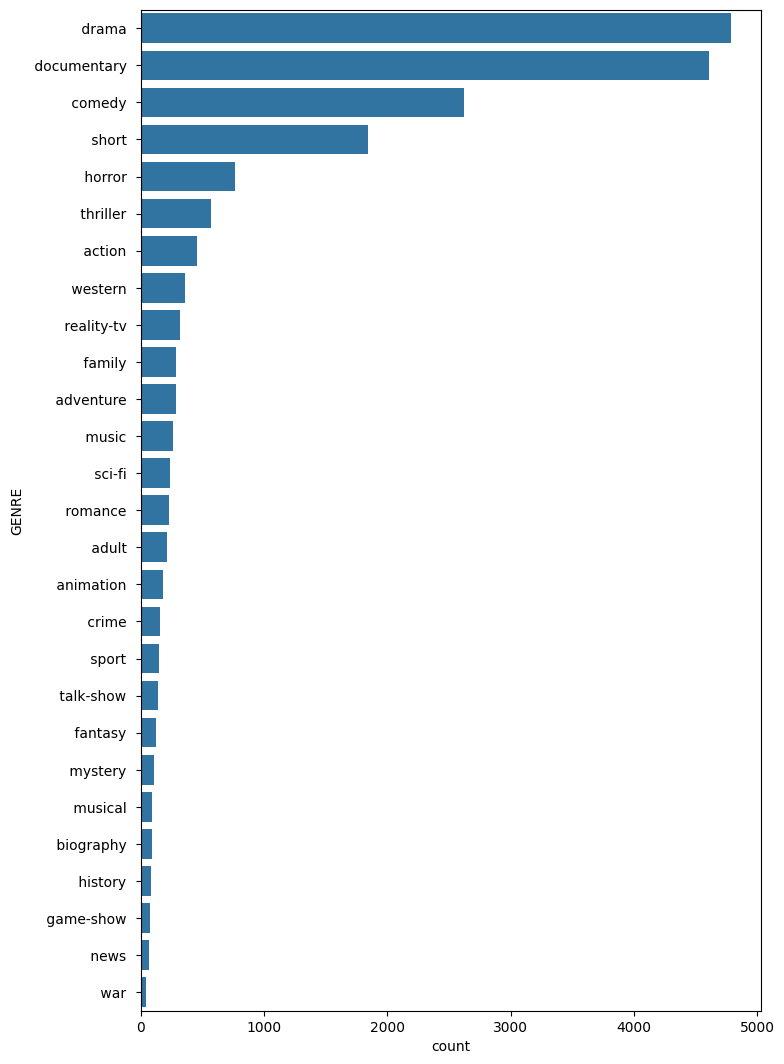

In [19]:
plt.figure(figsize=(8,13))
sns.countplot(data=train_data,y="GENRE",order=train_data["GENRE"].value_counts().index)
plt.show()

<ipython-input-20-8cc2700000ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data,x="GENRE",order=train_data["GENRE"].value_counts().index,palette="YlGnBu")


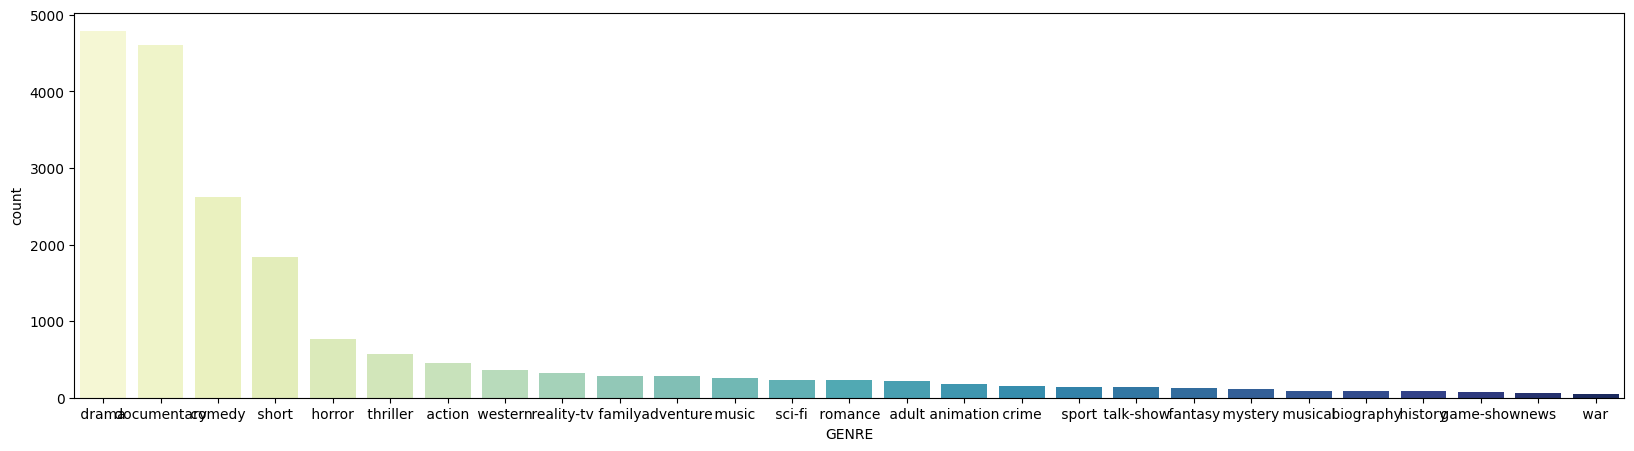

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(data=train_data,x="GENRE",order=train_data["GENRE"].value_counts().index,palette="YlGnBu")
plt.show()

In [23]:
stemmer = LancasterStemmer()
nltk.download('stopwords')#downloading stopwords
nltk.download('punkt')#downloading punkt
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
train_data

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
19162,Granitza (1994),drama,An autumn day in the 1970s. In the mountains ...,autumn day mountains southern border bulgaria ...
19163,Vintage (????),drama,"A psychological dramedy, where a well known A...",psychological dramedy well known actress mae p...
19164,Slaughterbots (2017),short,In response to growing concerns about autonom...,response growing concerns autonomous weapons c...
19165,Dwitiyo Ripu (2015),drama,Raktim Bose is struggling to publish his firs...,raktim bose struggling publish first novel ren...


**Using TF-IDF to vectorize the data**


In [25]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(train_data["TextCleaning"])

X_test = vectorize.transform(test_data["TextCleaning"])

**Split the data into train data and test data**

In [26]:
X = X_train
y = train_data["GENRE"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

**Train the model**

In [ ]:
model=SVC()
model.fit(X_train, Y_train)

In [ ]:
model.score(X_train,Y_train)

In [ ]:
y_pred=model.predict(X_test)
y_pred

In [ ]:
accuracy=accuracy_score(Y_test,y_pred)
print("Validatiion Accuracy:",accuracy)